## rule 1: ask stupid questions
## rule 2: run one cell at a time
## rule 3: when it doubt, print it out. (use as many inbetween steps as you need to understand code. )

# the goal of the tutorial is to: 
- get aquanted with geopandas
- get used to dataframe (df)

In [90]:
import geopandas as gpd # geopandas: pandas on teroids, made for geographical presentation
import pandas as pd

## data source of country shapes etc. 
https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

In [91]:
shapefile = 'data/countries_110m/ne_110m_admin_0_countries.shp'

we need to read country information in. The shp file contains the gemetry of the country, name of countries in different languages etc.
Most of those information we don't need. 
use .head(N) function to see the first N lines of info. 

In [92]:
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)

In [93]:
gdf.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [94]:
# explore what each columns might be
gdf['POP_EST'].head(4)

0      920938
1    53950935
2      603253
3    35623680
Name: POP_EST, dtype: int64

In [95]:
#explore the entire dataframe
gdf.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


keep the columns that we need, and change the names to something non-retarded. 

In [96]:
#choose 3 cols
gdf = gdf[['ADMIN', 'ADM0_A3', 'POP_EST', 'geometry']]

In [97]:
gdf.head(3)

,ADMIN,ADM0_A3,POP_EST,geometry
0,Fiji,FJI,920938,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,53950935,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,603253,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [98]:
#change collumn names
gdf.columns = ['country', 'country_code', 'population',  'geometry']
gdf.head(3)

,country,country_code,population,geometry
0,Fiji,FJI,920938,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,53950935,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,603253,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


## homework: what other intersting columns are there? 

# visualize population data with seaborn and distribution plot. (distplot)
## google if you don't know what distribution plot is. 

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### first, look at what the polulation data looks like

In [100]:
gdf['population'].describe()

count    1.770000e+02
mean     4.171237e+07
std      1.459691e+08
min      1.400000e+02
25%      3.360148e+06
50%      9.961396e+06
75%      2.938430e+07
max      1.379303e+09
Name: population, dtype: float64

second, knowing polulation range, make some reasonable "bins" to make a histogram. 
bins: numerical category of ranges. google what ever you don't know. 

In [101]:
#divides range between 0 to 1,500,000,000 with 16 boundaries into 15 segments. 
# think: |--|--| 3 boundaries makes 2 pieces.
bins = np.linspace(0, 1.5e+10, 16)
bins

array([0.0e+00, 1.0e+09, 2.0e+09, 3.0e+09, 4.0e+09, 5.0e+09, 6.0e+09,
       7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
       1.4e+10, 1.5e+10])

or you can just hand code 
bins = [0.e+00, 1.e+09, 2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09, 8.e+09, 9.e+09, 1.e+10]
if it's easier for you. 

/home/yang/anaconda3/envs/visualize/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

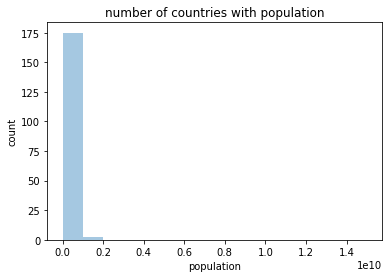

In [102]:
sns.distplot(gdf['population'], bins=bins, kde=False)
plt.title('number of countries with population')
plt.ylabel('count')

It did not work well because most countries have populatino way less than 1.5 billion!!!
Localize part of the graph will make a much better presentation

/home/yang/anaconda3/envs/visualize/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

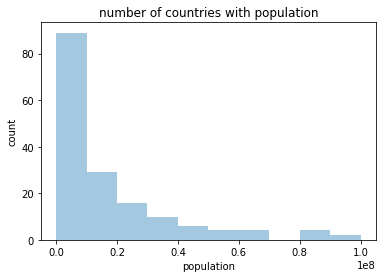

In [103]:
bins = np.linspace(0, 1.e+8, 11)
sns.distplot(gdf['population'], bins=bins, kde=False)
plt.title('number of countries with population')
plt.ylabel('count')

# homework: visulize something else!

# tut 2: use geoplot

In [104]:
import geoplot

In [105]:
# turn into GeoDataFrame so it understand the "geometry" column as shape defining country shape
gdf = gpd.GeoDataFrame(gdf)

In [106]:
gdf.columns

Index(['country', 'country_code', 'population', 'geometry'], dtype='object')

<AxesSubplot:>

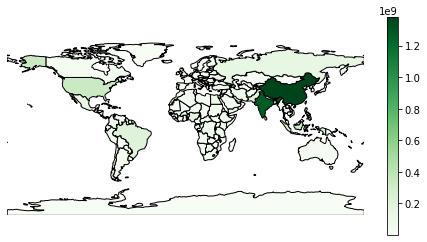

In [109]:
# plot. 
# hue: what you want your color to visualize. 
# cmap: what colors you want to choose
# figsize: size of the resulting graph
# legend: if you want to colorbar on the side. 
geoplot.choropleth(
    gdf, hue=gdf['population'],
    cmap='Greens', figsize=(8, 4), legend=True,
)

# homework: visualize something else, use some opther color! 
List of all cmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
e.g., try cmap = 'OrRd'